========== Epoca 1 ==========
H0 : 0.5932699921071872
H1 : 0.596884378259767
O0 : 0.7513650695523157
O1 : 0.7729284653214625
New Weights O0 [ 0.53075072  0.35891648  0.40866619]
New Weights O1 [ 0.61904912  0.51130127  0.56137012]
New Weights H0 [ 0.342732   0.1496366  0.1992732]
New Weights H1 [ 0.34562681  0.24978134  0.29956268]
Error O0 0.274811083176
Error O1 0.0235600255838
Error O0 0.274811083176
Error O1 0.0235600255838
Total Error: 0.29837110876
========== Epoca 2 ==========
H0 : 0.5914930845941218
H1 : 0.5958185225104348
O0 : 0.7284036135916898
O1 : 0.7783289976863375
New Weights O0 [ 0.45968918  0.31688407  0.36632641]
New Weights O1 [ 0.63730923  0.522102    0.57224983]
New Weights H0 [ 0.33635008  0.1493175   0.19863501]
New Weights H1 [ 0.34173308  0.24958665  0.29917331]
Error O0 0.258051876011
Error O1 0.0224023066102
Error O0 0.258051876011
Error O1 0.0224023066102
Total Error: 0.280454182621
========== Epoca 3 ==========
H0 : 0.5899308339841881
H1 : 0.5948687590065818

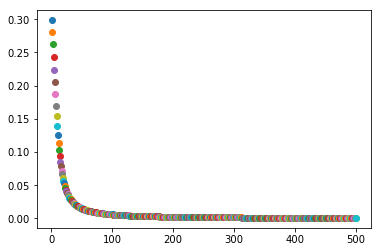

In [27]:
import numpy as np
import matplotlib.pyplot as plot
import math


def sigmoid(u):
    return 1 / (1 + math.exp(-u))


class Neuron(object):
    """ Classe responsável por representar um neurônio (hidden ou output) """

    def __init__(self, name, weights, learning_rate, desired=0.0):
        self.name = name
        self.weights = weights
        self.desired = desired
        self.learning_rate = learning_rate
        self.inputs = []
        self.output = 0
        self.error = 0

    def set_inputs(self, inputs):
        ##Adiciona um coeficiente 1 para o bias na matriz de entradas
        self.inputs = np.append(1, inputs)

    def propagate(self):
        """ Propaga as entradas pelo neuronio (somatório ponderado -> sigmoide) """
        summation = np.sum(self.inputs*self.weights)
        self.output = sigmoid(summation)
        print(self.name, ":", self.output)
        return self.output

    def calculate_e_out(self):
        """ Calcula a derivada do erro total pela saida do neuronio da camada output """
        return -(self.desired - self.output)

    def calculate_e_out_net(self, e_out):
        """ Calcula a derivada da saida do neuronio pelo somatório """
        out_net = self.output*(1-self.output)
        return e_out*out_net

    def retro_propagate(self, e_out):
        """ Recebe e_out (derivada do erro total pela saida do neuronio em questão e recalcula os pesos """
        e_out_net = self.calculate_e_out_net(e_out)
        self.weights = self.weights-(self.inputs*e_out_net*self.learning_rate)
        print("New Weights", self.name, self.weights)

    def calculate_error(self):
        """ Calcula o erro quadrático e retorna """
        self.error = self.desired-self.output
        self.error = (self.error*self.error)/2
        print("Error", self.name, self.error)
        return self.error


class MultilayerPerceptron(object):
    """ Classe responsável por representar uma rede neural Multilayer Perceptron com duas camadas """

    def __init__(self, hidden_weigths, output_weigths, learning_rate, desireds):
        self.hidden_layer = []
        for k, w in enumerate(hidden_weigths):
            self.hidden_layer.append(Neuron("H"+str(k), np.array(w), learning_rate))

        self.output_layer = []
        for k, w in enumerate(output_weigths):
            self.output_layer.append(Neuron("O"+str(k), np.array(w), learning_rate, desireds[k]))

    def set_inputs(self, inputs):
        for h in self.hidden_layer:
            h.set_inputs(np.array(inputs))

    def propagate(self):
        outputs = []
        # propaga na camada hidden
        for h in self.hidden_layer:
            outputs.append(h.propagate())
        # pega as saidas da camada hidden, joga como entrada na camada output e propaga nessa camada
        for o in self.output_layer:
            o.set_inputs(np.array(outputs))
            o.propagate()

    def retro_propagate(self):
        # e_out_h é a derivada do Erro no neuronio Oi em ghj (saida do neuronio j da camada hidden)
        e_out_h = []
        for o in self.output_layer:
            e_out = o.calculate_e_out()
            e_out_net = o.calculate_e_out_net(e_out)
            e_out_h.append(o.weights * e_out_net)
            # retro propaga na camada de saida
            o.retro_propagate(e_out)

        # faz a transposta visto que para cada neuronio da camada de entrada é necessário o somatorio das derivadas de
        # acordo com erros de cada neuronio de saida
        e_out_h = np.transpose(e_out_h)

        for k, h in enumerate(self.hidden_layer):
            # faz o somatório das derivadas de todos os erros em ghj e propaga na camada hidden
            h.retro_propagate(np.sum(e_out_h[k]))

    def calculate_error(self):
        """ Calcula o erro somando os erros quadráticos de cada neuronio da camada de saida """
        error = 0
        for o in self.output_layer:
            error += o.calculate_error()
        return error


nna = MultilayerPerceptron(
    # Pesos e bias da camada hidden
    np.array([[0.35, 0.15, 0.2], 
              [0.35, 0.25, 0.3]]),
    # Pesos e bias da camada output
    np.array([[0.6, 0.4, 0.45], 
              [0.6, 0.5, 0.55]]),
    # taxa de aprendizagem e saidas desejáveis
    0.5, np.array([0.01, 0.99])
)
nna.set_inputs(np.array([0.05, 0.1]))

for i in range(0, 500):
    print("========== Epoca "+str(i+1)+" ==========")
    nna.propagate()
    nna.retro_propagate()
    plot.plot(i+1, nna.calculate_error(), marker='o')
    print("Total Error:", nna.calculate_error())

plot.show()